# Plot Magnetic Sensor Data

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#sns.set(sytle="darkgrid")
import math

---
Modified  By    Reason
01-Jan-22 CBL   Original
----

# Here is the body of the code, example of using markdown

In [43]:
# Import the CSV using pandas
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# In the file provided there are 1002 lines by 13 columns. 
# The data is organized by the way the names are assigned. 
#df = pd.read_csv("Mag2.CSV",names=['Index','Time','GX','GY','GZ','AX','AY','AZ','MX','MY','MZ','H','R','P'])
# Or I can format the file with Row 0 containing the names comma delimited and use a simpler read. 
# This data was taken using a 9DOF sensor from Sparkfun into an Arduino. 
# The sensor was slowly rotated several times. 
df = pd.read_csv("Mag2.CSV",dtype={'Index':np.int32,'Time':np.float64,
                                   'GX':np.float64,'GY':np.float64,'GZ':np.float64,
                                   'AZ':np.float64,'AY':np.float64,'AZ':np.float64,
                                   'MX':np.float64,'MY':np.float64,'MZ':np.float64,
                                   'H':np.float64,'R':np.float64,'P':np.float64})

# The data is now in a DataFrame (df)
# Print out some of the information about the data frame. 
#
print('Mag2.CSV data format:', df.shape )
print(df.columns)
# Access the data
# This gives a vector of time only 
t = df['Index']
#print(t)
# Normalize the time from t0
t = t - t[0]
#
# Use Later, a way to slice the data. 
#
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
#

Mag2.CSV data format: (1000, 14)
Index(['Index', 'Time', 'GX', 'GY', 'GZ', 'AX', 'AY', 'AZ', 'MX', 'MY', 'MZ',
       'H', 'R', 'P'],
      dtype='object')


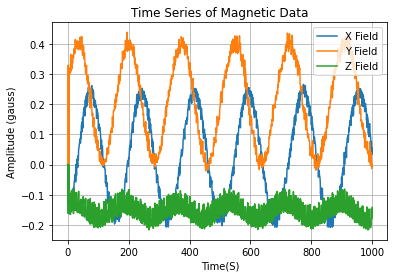

In [44]:
Mx = df['MX']     # Magnetic field X only
My = df['MY']
Mz = df['MZ']
H  = df['H']
plt.plot(t,Mx,label='X Field')
plt.plot(t,My,label='Y Field')
plt.plot(t,Mz,label='Z Field')
#
# Add Axis markers. 
#
plt.title("Time Series of Magnetic Data")
plt.xlabel("Time(S)")
plt.ylabel("Amplitude (gauss)")
#
# Grid on (also shows other projections) https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
plt.grid()
plt.legend()
plt.show()

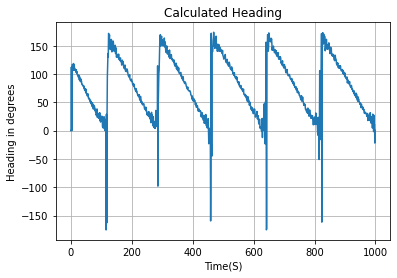

In [50]:
## # Calculate heading
#
CH = np.arctan2(My,Mx)
# convert to degrees
H = np.rad2deg(CH)
plt.plot(t,H)
plt.title("Calculated Heading")
plt.xlabel("Time(S)")
plt.ylabel("Heading in degrees")
plt.grid()
plt.show()

In [ ]:
# The discontinuity needs to be addressed. It never quite goes through zero, which it should

# np.unwrap() use later